In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [3]:
DATASET_DIR = "../dataset/classification/bank"
SAVE_NAME = "bank.csv"

In [4]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
pd.crosstab(df["y"],df["contact"])

contact,cellular,telephone
y,,
no,22291,14257
yes,3853,787


In [12]:
def plot_tsne(df, split_col, target_col, sample_num=None):

    if sample_num is None:
        features_ori = df.drop(columns=[split_col,target_col])
    else:
        features_ori = df.drop(columns=[split_col,target_col]).sample(sample_num)
    is_cat_cols = features_ori.dtypes == object
    cat_cols = features_ori.columns[is_cat_cols]
    num_cols = features_ori.columns[~is_cat_cols]

    onehot = OneHotEncoder(sparse=False)
    features_cat = onehot.fit_transform(features_ori[cat_cols])

    features_num = features_ori[num_cols].values

    print(features_cat.shape, features_num.shape)
    features_ori = np.concatenate([features_num, features_cat], axis=1)
    scaler = StandardScaler()
    features = scaler.fit_transform(features_ori)

    tsne = TSNE(perplexity=10, random_state=0)
    features_embedd = tsne.fit_transform(features)

    df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
    df_embedd[split_col] = df[split_col]
    df_embedd[target_col] = df[target_col]

    sns.relplot(x="embedd_x", y="embedd_y", hue=target_col, col=split_col, data=df_embedd)

(1000, 48) (1000, 10)


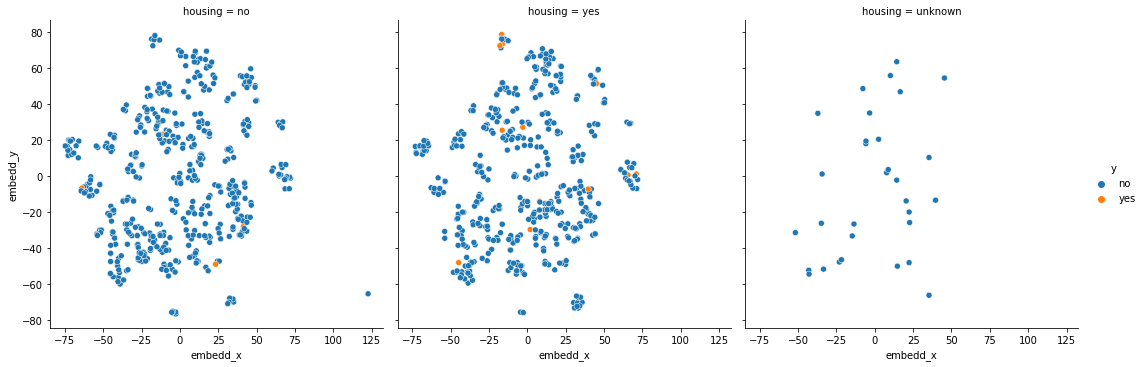

In [19]:
plot_tsne(df, "housing", "y", 1000)

In [17]:
df_yes = df[df["y"]=="yes"]
num_yes = len(df_yes)
sample_no = df.query("y=='no'").sample(num_yes)
df_sample = pd.concat([df_yes, sample_no], axis=0, sort=False)

(9280, 50) (9280, 10)


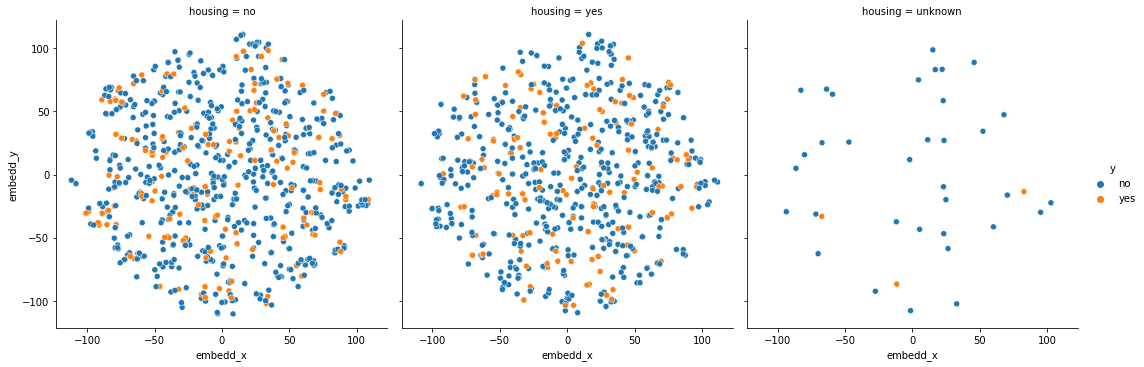

In [18]:
plot_tsne(df_sample, "housing", "y")

(9280, 51) (9280, 10)


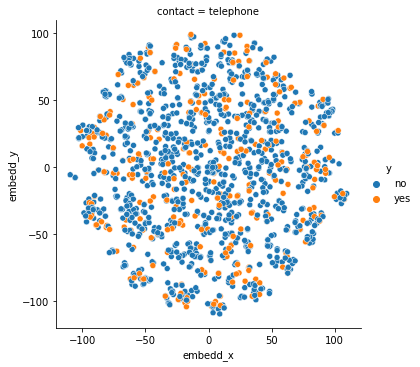

In [20]:
plot_tsne(df_sample, "contact", "y")